# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas que añadan aunque sea un poco de información a lo que está ocurriendo.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [49]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [50]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [51]:
#url de este notebook en github
github_url = 'https://github.com/mharias/covid/blob/master/graficos_escovid19data.ipynb'

In [52]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [53]:
#url de la fuente de datos
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

Leemos los datos en un `pandas`

In [54]:
df = pd.read_csv(path_montera34)

veamos una rápida descripción de la información:

In [55]:
df.describe()

ine_code    new_cases          PCR         TestAc       activos  \
count  17276.000000  5210.000000  4514.000000    1115.000000   1810.000000   
mean      26.501158    88.600576   134.343435   10505.824215   1268.529282   
std       15.012626   168.905062   311.354221   27128.894820   1688.091541   
min        1.000000   -67.000000   -67.000000       0.000000      0.000000   
25%       13.000000     6.000000     8.000000       3.000000    209.000000   
50%       26.000000    32.000000    48.000000      20.000000    636.000000   
75%       40.000000    88.000000   140.000000     593.000000   1654.000000   
max       52.000000  1992.000000  4419.000000  121117.000000  14617.000000   

       hospitalized  intensive_care      deceased  cases_accumulated  \
count  11736.000000    11599.000000  12801.000000        8178.000000   
mean     197.609577       28.489697    639.502461        8371.649425   
std      734.617300       87.402860   1883.819960       19731.700908   
min        0.000000        0.000000      0.000000           0.000000   
25%       15.000000        2.000000     99.000000         928.250000   
50%       58.000000        9.000000    225.000000        2631.500000   
75%      162.000000       26.000000    424.000000        6869.500000   
max    15227.000000     1528.000000  13403.000000      232314.000000   

       cases_accumulated_PCR     recovered  deceased_hosp_eus     num_casos  \
count            9371.000000   8193.000000         570.000000  17212.000000   
mean            11483.194323   2539.818364         386.150877     93.015977   
std             34000.418674   4313.020906         239.762188    288.002219   
min                 0.000000      0.000000         130.000000      0.000000   
25%              1603.500000    490.000000         212.500000      1.000000   
50%              3612.000000   1377.000000         278.500000     13.000000   
75%              7496.000000   2793.000000         591.000000     79.000000   
max            356103.000000  50616.000000         982.000000   6730.000000   

       num_casos_prueba_pcr  num_casos_prueba_test_ac  num_casos_prueba_otras  \
count          17212.000000              17212.000000            17212.000000   
mean              84.208053                  0.269579                8.425633   
std              268.920773                  1.516994               52.603656   
min                0.000000                  0.000000                0.000000   
25%                1.000000                  0.000000                0.000000   
50%               12.000000                  0.000000                0.000000   
75%               74.000000                  0.000000                0.000000   
max             6716.000000                 32.000000             1171.000000   

       num_casos_prueba_desconocida     poblacion  cases_per_cienmil  \
count                  17212.000000  1.727600e+04        8178.000000   
mean                       0.112712  9.039942e+05         780.251632   
std                        1.355247  1.176550e+06         974.891588   
min                        0.000000  8.477700e+04           0.000000   
25%                        0.000000  3.167980e+05         152.810000   
50%                        0.000000  5.810780e+05         416.100000   
75%                        0.000000  1.022800e+06         993.895000   
max                       65.000000  6.663394e+06        5687.630000   

       intensive_care_per_1000000  deceassed_per_100000  \
count                11599.000000          12408.000000   
mean                     3.147351             59.425105   
std                      3.901654             55.400787   
min                      0.000000              0.000000   
25%                      0.430000             14.250000   
50%                      1.720000             39.140000   
75%                      4.550000             95.970000   
max                     28.720000            257.580000   

       hospitalized_per_100000  case

y un muestreo de valores y de algunas columnas de interés:

In [56]:
df.head()

date          province  ine_code                     ccaa  new_cases  \
0  2020-01-01          Albacete         2     Castilla - La Mancha        NaN   
1  2020-01-01  Alicante/Alacant         3     Comunitat Valenciana        NaN   
2  2020-01-01           Almería         4                Andalucía        NaN   
3  2020-01-01       Araba/Álava         1               País Vasco        NaN   
4  2020-01-01          Asturias        33  Asturias, Principado de        NaN   

   PCR  TestAc  activos  hospitalized  intensive_care  deceased  \
0  NaN     NaN      NaN           NaN             NaN       NaN   
1  NaN     NaN      NaN           NaN             NaN       NaN   
2  NaN     NaN      NaN           NaN             NaN       NaN   
3  NaN     NaN      NaN           NaN             NaN       NaN   
4  NaN     NaN      NaN           NaN             NaN       NaN   

   cases_accumulated  cases_accumulated_PCR  recovered  deceased_hosp_eus  \
0                NaN                    NaN        NaN                NaN   
1                NaN                    NaN        NaN                NaN   
2                NaN                    NaN        NaN                NaN   
3                NaN                    NaN        NaN                NaN   
4                NaN                    NaN        NaN                NaN   

   num_casos  num_casos_prueba_pcr  num_casos_prueba_test_ac  \
0        0.0                   0.0                       0.0   
1        0.0                   0.0                       0.0   
2        0.0                   0.0                       0.0   
3        0.0                   0.0                       0.0   
4        0.0                   0.0                       0.0   

   num_casos_prueba_otras  num_casos_prueba_desconocida  poblacion  \
0                     0.0                           0.0     388167   
1                     0.0                           0.0    1858683   
2                     0.0                           0.0     716820   
3                     0.0                           0.0     331549   
4                     0.0                           0.0    1022800   

   cases_per_cienmil  intensive_care_per_1000000  deceassed_per_100000  \
0                NaN                         NaN                   NaN   
1                NaN                         NaN                   NaN   
2                NaN                         NaN                   NaN   
3                NaN                         NaN                   NaN   
4                NaN                         NaN                   NaN   

   hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
0                      NaN           NaN          NaN               NaN   
1                      NaN           NaN          NaN               NaN   
2                      NaN           NaN          NaN               NaN   
3                      NaN           NaN          NaN               NaN   
4                      NaN           NaN          NaN               NaN   

   cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
0              NaN          NaN               NaN              NaN   
1              NaN          NaN               NaN              NaN   
2              NaN          NaN               NaN              NaN   
3              NaN          NaN               NaN              NaN   
4              NaN          NaN               NaN              NaN   

   daily_cases_PCR_avg7  daily_deaths  daily_deaths_hosp_eus  \
0                   NaN           NaN                    NaN   
1                   NaN           NaN                    NaN   
2                   NaN           NaN                    NaN   
3                   NaN           NaN                    NaN   
4                   NaN           NaN                    NaN   

   daily_deaths_inc  daily_deaths_avg3  daily_deaths_avg7  \
0               NaN                NaN                NaN   
1               NaN       

In [57]:
df.tail()

date           province  ine_code                  ccaa  \
17271  2020-11-28              Soria        42       Castilla y León   
17272  2020-11-28             Toledo        45  Castilla - La Mancha   
17273  2020-11-28  Valencia/València        46  Comunitat Valenciana   
17274  2020-11-28         Valladolid        47       Castilla y León   
17275  2020-11-28             Zamora        49       Castilla y León   

       new_cases  PCR  TestAc  activos  hospitalized  intensive_care  \
17271       38.0  NaN     NaN      NaN          30.0             5.0   
17272        NaN  0.0     NaN      NaN         216.0            30.0   
17273      704.0  NaN     NaN      NaN         589.0           157.0   
17274      122.0  NaN     NaN      NaN         202.0            74.0   
17275       71.0  NaN     NaN      NaN          80.0            14.0   

       deceased  cases_accumulated  cases_accumulated_PCR  recovered  \
17271     161.0                NaN                 5594.0      676.0   
17272    1349.0                NaN                33764.0        NaN   
17273       NaN            54791.0                    NaN        NaN   
17274     745.0                NaN                29223.0     4244.0   
17275     279.0                NaN                 8029.0     1192.0   

       deceased_hosp_eus  num_casos  num_casos_prueba_pcr  \
17271                NaN        NaN                   NaN   
17272                NaN        NaN                   NaN   
17273                NaN        NaN                   NaN   
17274                NaN        NaN                   NaN   
17275                NaN        NaN                   NaN   

       num_casos_prueba_test_ac  num_casos_prueba_otras  \
17271                       NaN                     NaN   
17272                       NaN                     NaN   
17273                       NaN                     NaN   
17274                       NaN                     NaN   
17275                       NaN                     NaN   

       num_casos_prueba_desconocida  poblacion  cases_per_cienmil  \
17271                           NaN      88636                NaN   
17272                           NaN     694844                NaN   
17273                           NaN    2565124             2136.0   
17274                           NaN     519546                NaN   
17275                           NaN     172539                NaN   

       intensive_care_per_1000000  deceassed_per_100000  \
17271                        5.64                181.64   
17272                        4.32                194.14   
17273                        6.12                   NaN   
17274                       14.24                143.39   
17275                        8.11                161.70   

       hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
17271                    33.85           NaN          NaN             538.0   
17272                    31.09           NaN          NaN            2455.0   
17273                    22.96        9784.0       4413.0               NaN   
17274                    38.88           NaN          NaN            3796.0   
17275                    46.37           NaN          NaN            1099.0   

       cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
17271            219.0         38.0              31.0             38.0   
17272            959.0          NaN               NaN              0.0   
17273              NaN        704.0             752.0              NaN   
17274           1244.0        122.0             177.4            122.0   
17275            458.0         71.0              65.4             71.0   

       daily_cases_PCR_avg7  daily_deaths  daily_deaths_hosp_eus  \
17271                  31.3           0.0                    NaN   
17272                 137.0           0.0                    NaN   
17273                   NaN           NaN                    NaN   
17274                 177.7   

In [58]:
provincias = sorted(df['province'].unique())

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [59]:
df['date']=pd.to_datetime(df['date'])

In [60]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'intensive_care', 'deceased',
       'cases_accumulated', 'cases_accumulated_PCR', 'recovered',
       'deceased_hosp_eus', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_otras',
       'num_casos_prueba_desconocida', 'poblacion', 'cases_per_cienmil',
       'intensive_care_per_1000000', 'deceassed_per_100000',
       'hospitalized_per_100000', 'cases_14days', 'cases_7days',
       'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_hosp_eus', 'daily_deaths_inc',
       'daily_deaths_avg3', 'daily_deaths_avg7', 'daily_deaths_avg7_hosp_eus',
       'deaths_last_week', 'num_casos_avg7', 'num_casos_prueba_pcr_avg7',
       'ia14', 'source_name', 'source', 'comments'],
      dtype='object')

In [61]:
campos = {'Almería':'daily_cases', 'Cádiz':'daily_cases', 'Córdoba':'daily_cases',
          'Granada':'daily_cases', 'Huelva':'daily_cases', 'Jaén':'daily_cases',
       'Málaga':'daily_cases', 'Sevilla':'daily_cases', 'Huesca':'casos_nuevos_aragon',
          'Teruel':'casos_nuevos_aragon', 'Zaragoza':'casos_nuevos_aragon', 
          'Asturias':'PCR','Balears, Illes':'PCR', 'Palmas, Las':'daily_cases', 
          'Santa Cruz de Tenerife':'daily_cases','Cantabria':'PCR',
          'Albacete':'daily_cases_PCR', 'Ciudad Real':'daily_cases_PCR',
          'Cuenca':'daily_cases_PCR', 'Guadalajara':'daily_cases_PCR',
       'Toledo':'daily_cases_PCR', 'Ávila':'daily_cases_PCR', 'Burgos':'daily_cases_PCR',
          'León':'daily_cases_PCR', 'Palencia':'daily_cases_PCR', 'Salamanca':'daily_cases_PCR',
       'Segovia':'daily_cases_PCR', 'Soria':'daily_cases_PCR', 'Valladolid':'daily_cases_PCR',
          'Zamora':'daily_cases_PCR', 'Barcelona':'daily_cases', 'Girona':'daily_cases',
       'Lleida':'daily_cases', 'Tarragona':'daily_cases', 'Ceuta':'new_cases',
          'Alicante/Alacant':'casos_nuevos_valencia','Castellón/Castelló':'casos_nuevos_valencia',
          'Valencia/València':'casos_nuevos_valencia','Badajoz':'new_cases', 'Cáceres':'new_cases',
       'Coruña, A':'daily_cases', 'Lugo':'daily_cases', 'Ourense':'daily_cases', 
          'Pontevedra':'daily_cases', 'Madrid':'daily_cases_PCR', 'Melilla':'PCR',
       'Murcia':'daily_cases', 'Navarra':'PCR', 'Araba/Álava':'daily_cases_PCR',
          'Bizkaia':'daily_cases_PCR', 'Gipuzkoa':'daily_cases_PCR',
       'Rioja, La':'PCR'}

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

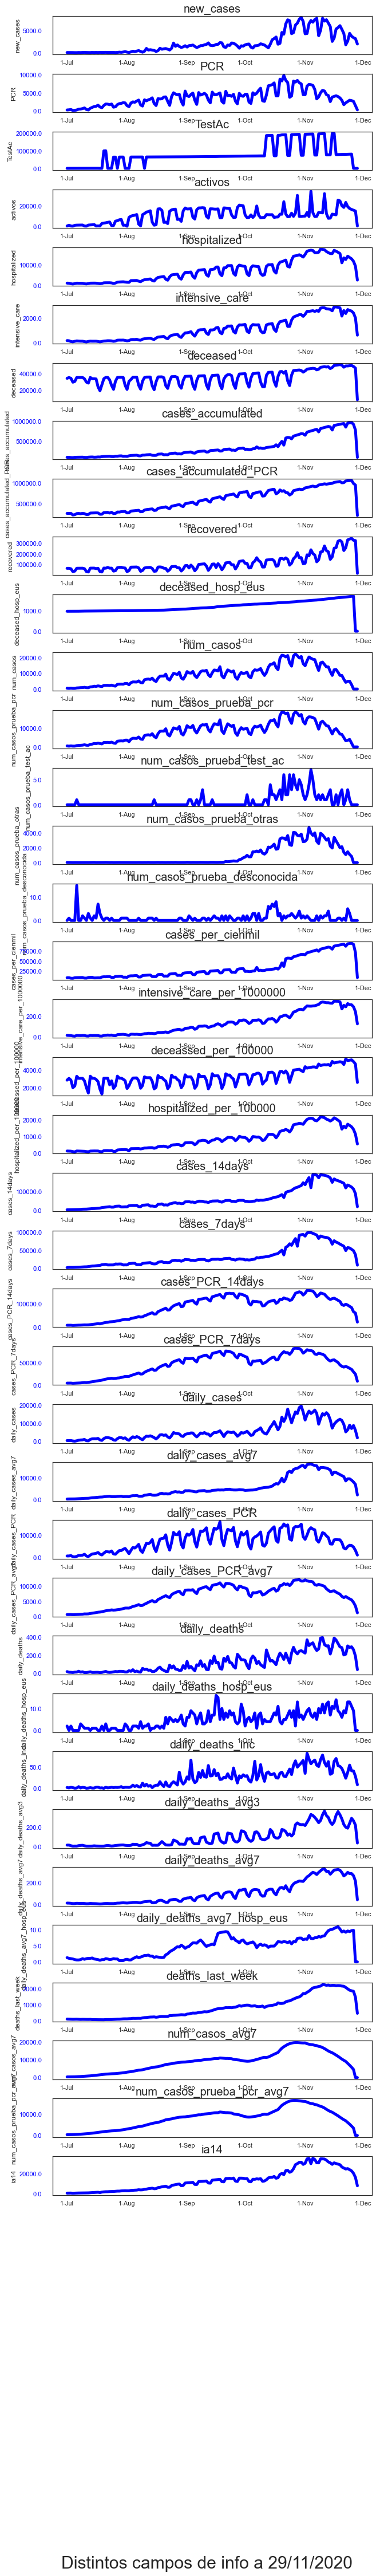

In [62]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

Una vez analizadas cada una de las columnas de datos podremos elegir las que queremos presentar..

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [63]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparamos los datos. Es importante añadir un zero a los campos NotANumber..


datos = df.fillna(0,axis=1)
datos = datos.sort_values(by=['province','date'], inplace=False, ascending=True)
provincias = sorted(df['province'].unique())
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_ratio = 'red'
color_fill = 'royalblue'
color_titulos = 'navy'
color_linea='darkred'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='casos_nuevos'
casos_nuevos_valencia='casos_nuevos_valencia'
casos_nuevos_aragon = 'casos_nuevos_aragon'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'
valencia=['Alicante/Alacant','Castellón/Castelló', 'Valencia/València']
aragon = ['Zaragoza','Huesca','Teruel']
for provincia in valencia:
    datos.loc[datos['province']==provincia,casos_nuevos_valencia]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

for provincia in aragon:
    datos.loc[datos['province']==provincia,casos_nuevos_aragon]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

    
    
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,campos[provincia]].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie  
    

    


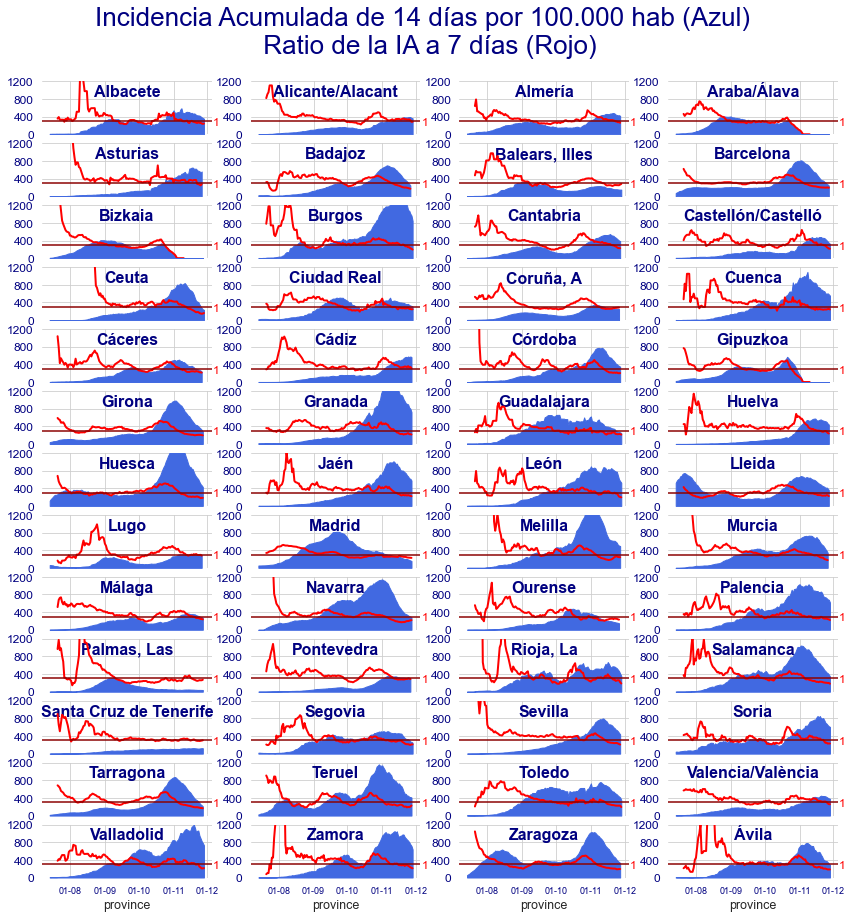

In [103]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)

# Título



#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
    ax1.set_ylim(0,1200)
    ax1.set_yticks([0,600,1200])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    ax1.grid(True)
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    ax2.set_ylim(0,4)
    ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax.transAxes)

#g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
#g.set(yticks=[])
#g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...

#for ax in g.axes:
#    ax.xaxis.set_major_formatter(XmajorFmt)
 #   ax.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
 #   ax.xaxis.set_major_locator(DayLocator([1,15]))
    
#    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
#    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# [plt.setp(ax.texts, text="") for ax in g.axes.flat] 
# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)
#plt.tight_layout(w_pad=1,h_pad=10,pad=10)

#g.fig.subplots_adjust(top=.7)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
#g.fig.subplots_adjust(top=.9)
g.fig.subplots_adjust(top=.9,wspace=0.23,hspace=.17)   

plt.savefig('graficos/pcr_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


# Gráficos de una lista específica de provincias

Y ahora preparemos gráficos más específicos por Comunidades siguiendo con el modelo `facetgrid` de `seaborn`. Veremos que en cada sección de preparación de datos filtraremos por la lista de provincias de cada comunidad.

In [65]:
def grafico_IA14_ratio(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
        ax1.set_ylim(0,1000)
        ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy')
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        
        ax2 = ax1.twinx()
        ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=5, color=color_ratio)
        ax2.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_ratio)
        ax2.set_ylim(0,4)
        ax2.set_yticks([1])
        ax2.xaxis.set_major_formatter(XmajorFmt)
        #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
        ax2.xaxis.set_major_locator(DayLocator([1,15]))
        ax2.xaxis.set_tick_params(labelsize=14,width=25,length=25,direction='out',labelcolor='navy')
    
        #x0,x1=ax2.get_xlim()
        ax2.axhline(1,color=color_linea)
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

In [ ]:
def grafico_IA14_ratio(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid pero con varias funcionaes para el segundo eje y
    clave_avg='daily_cases_PCR_avg7'
    clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    casos_nuevos='daily_cases'
    ventana_IA=14
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    datos_ = datos.fillna(0,axis=1)
    datos_ = datos_[(datos_['date']>=datetime(year=2020,month=3,day=1)) & (datos_['province'].isin(provincias))]

    for provincia in provincias:
        datos_.loc[datos_['province']==provincia,AI]=\
        datos_.loc[datos_['province']==provincia,campos[provincia]].rolling(ventana_IA).sum()\
        /datos_.loc[datos_['province']==provincia,'poblacion']*100000

        serie=datos_.loc[datos_['province']==provincia,AI].pct_change(periods=7).add(1)
        datos_.loc[datos_['province']==provincia,clave_ratio]=serie    
    

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
    # Título
    #g.fig.set_figwidth(20)
    #g.fig.set_figheight(10)
    #g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
    #g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
    #       fontsize=24,color=color_titulos)

    #g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
    #           fontsize=24,horizontalalignment='left',color=color_titulos)


    XmajorFmt = DateFormatter('%d-%b')

    g.map(plt.fill_between, 'date',AI,color=color_diarios)

    ejes = g.axes

    for i,ax in enumerate(ejes):
        #ax.set_title('')
        ax.xaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_titulos)
        ax.grid(False)
        lista_y = ax.get_yticks()
        ax.set_yticks([0,200,400,600,800])
        ax.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_titulos)
        ax.set_xlabel('')
        if i % columnas ==0:
            #ax.set_yticks([0,200,400,600,800])
            ax.yaxis.set_tick_params(labelsize=24,labelcolor=color_titulos)
            ax.yaxis.set_major_locator(plt.MaxNLocator(4))
            ax.set_ylabel(y_IA,size=20,color=color_avg)
        
    
        ax2 = ax.twinx()
        ax2.grid(True)
        ax2.set_yticks([0,1,2,3])
        ax2.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_avg)
        ax2.set_ylim(0,5)
        ax2.fill_between(datos_['date'].unique(), datos_[datos_['province'] == provincias[i]][clave_ratio], lw=3, color=color_avg)
    
        ax2.xaxis.set_major_formatter(XmajorFmt)
        ax2.xaxis.set_tick_params(labelsize=14,width=5,labelcolor=color_titulos)
        ax2.xaxis.set_major_locator(DayLocator([1]))
        ax2.set_xlabel('')
        ax2.set_title('')
    
        if i % columnas == columnas-1:
        
            ax2.yaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_avg)
            #ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
            ax2.set_yticks([0,1,2,3])
            ax2.set_ylabel(y_ratio,size=20,color=color_avg)
# Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        #ax.set_title('')
        #ax.set_suptitle('')
        ax.text(0.8, .9, label, fontweight="bold",
            ha="center", va="center", size=24,transform=ax.transAxes,color=color_titulos)
    g.map(label,'province')


    axes = g.axes.flatten()
    for ax in axes:
        ax.set_xlabel("")
    #    ax.set_ylabel('')
    g.set_titles('')




    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=100)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

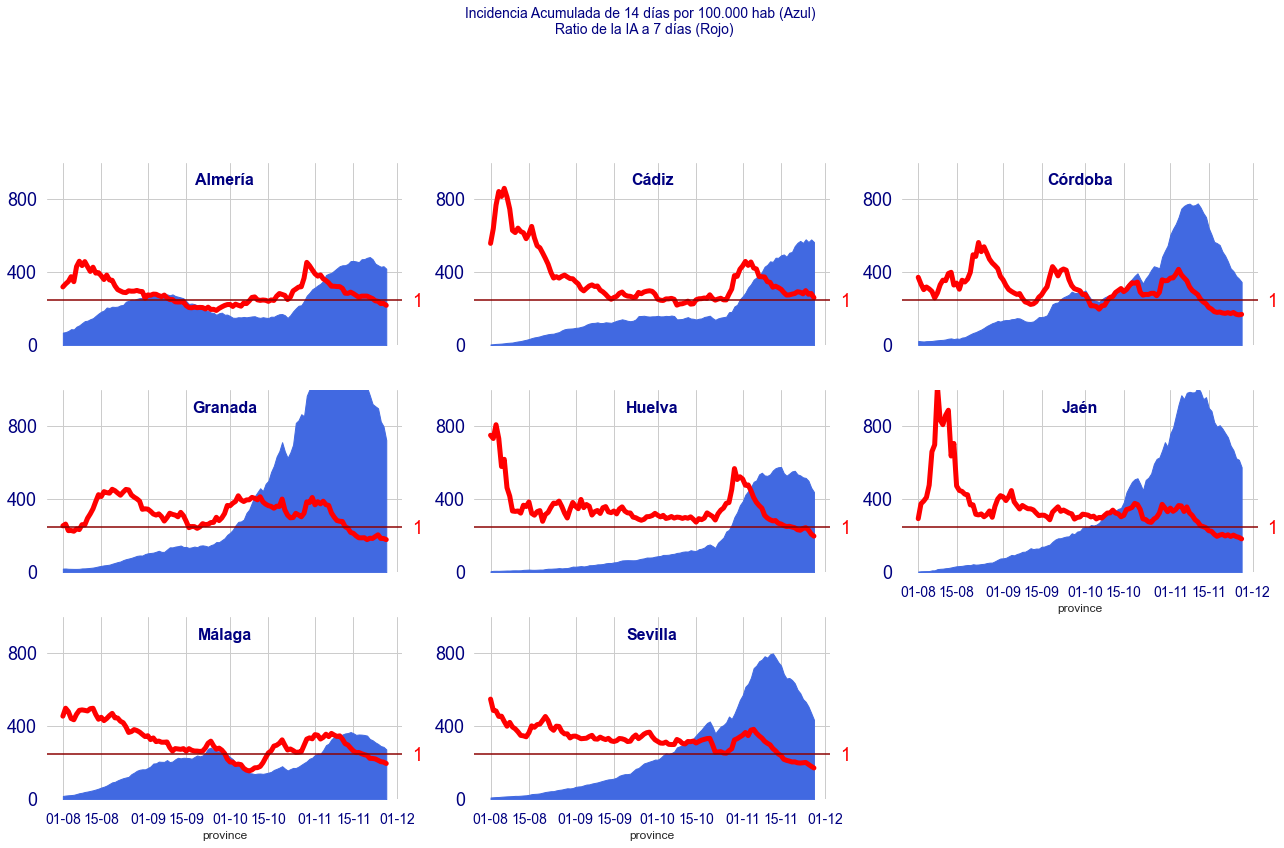

In [66]:
grafico_IA14_ratio(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')

<Figure size 720x360 with 0 Axes>

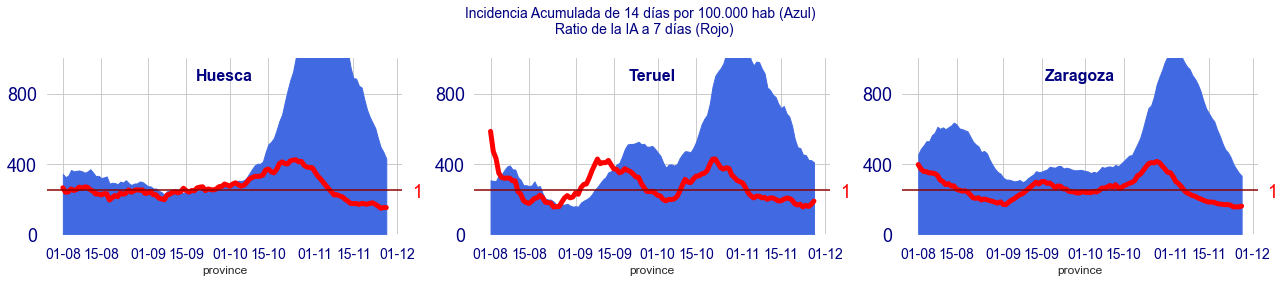

In [67]:
grafico_IA14_ratio(datos,campos,['Huesca','Teruel','Zaragoza'],'aragon')

<Figure size 720x360 with 0 Axes>

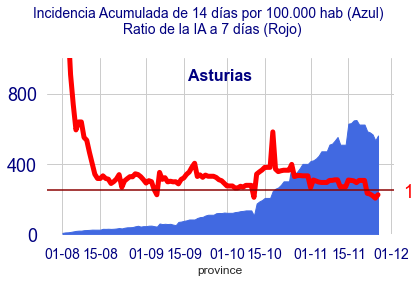

In [68]:
grafico_IA14_ratio(datos,campos,['Asturias'],'asturias')

<Figure size 720x360 with 0 Axes>

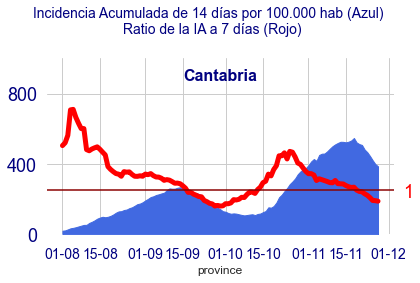

In [69]:
grafico_IA14_ratio(datos,campos,['Cantabria'],'cantabria')

<Figure size 720x360 with 0 Axes>

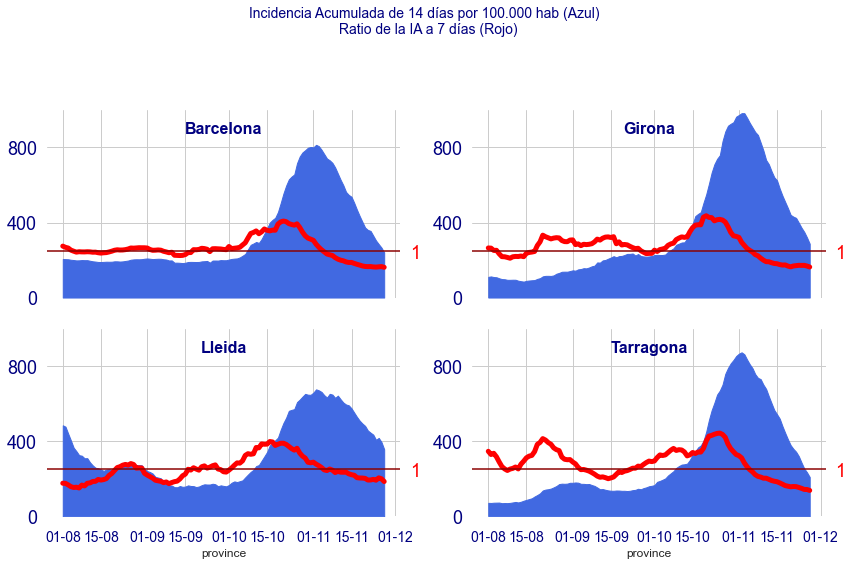

In [70]:
grafico_IA14_ratio(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña')

<Figure size 720x360 with 0 Axes>

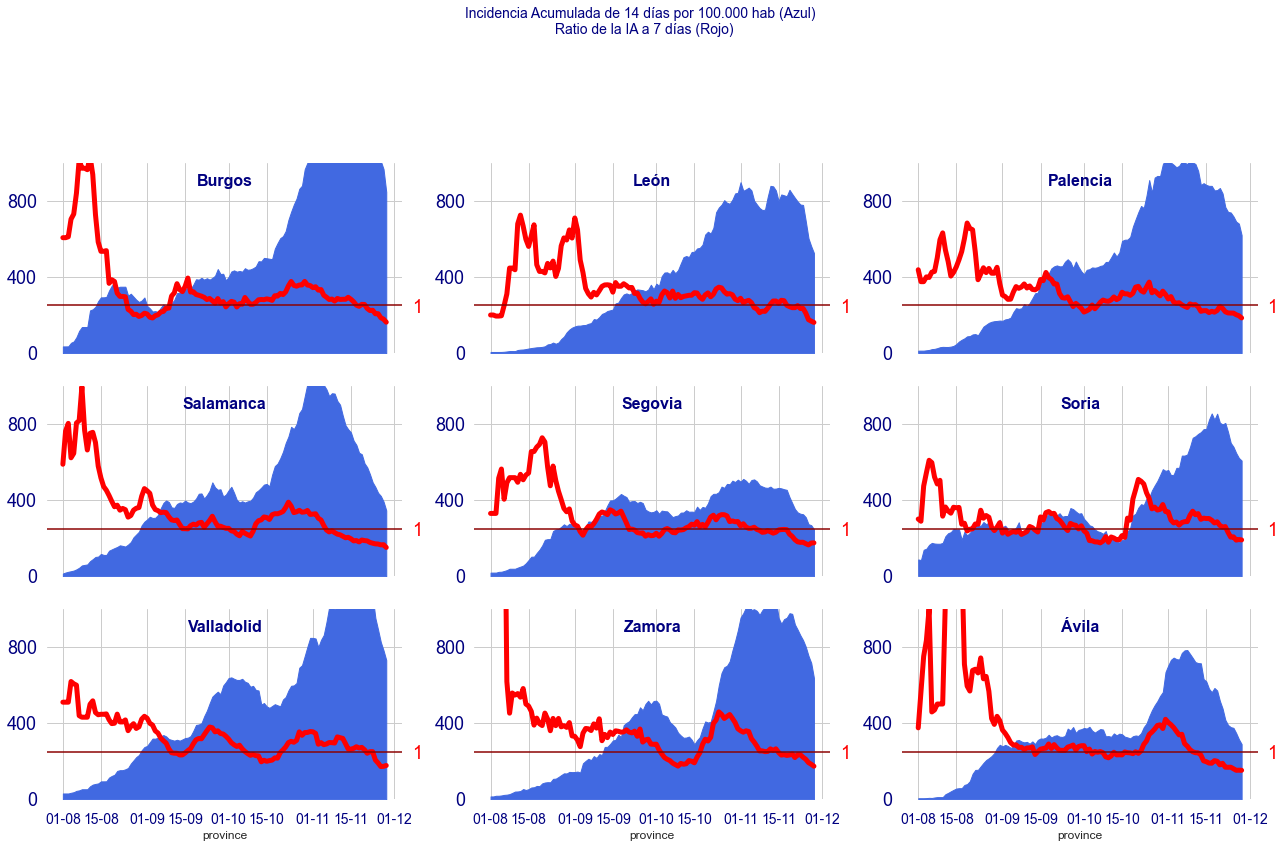

In [71]:
grafico_IA14_ratio(datos,campos,['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
                  ,'castilla_leon')

<Figure size 720x360 with 0 Axes>

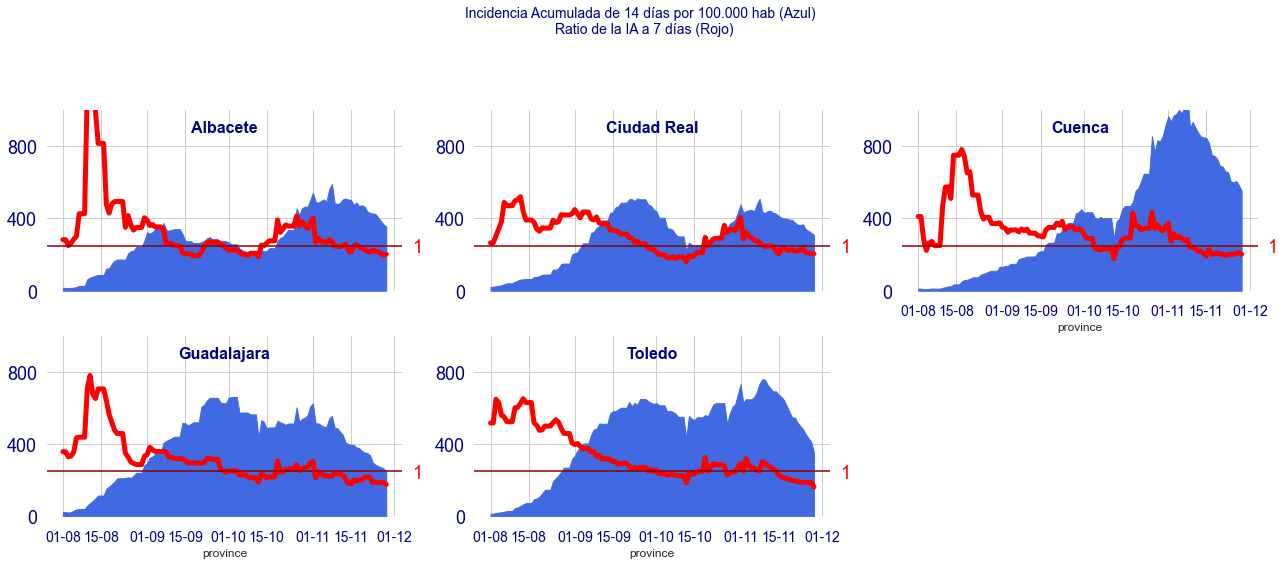

In [72]:
grafico_IA14_ratio(datos,campos,['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'],'castilla_lamancha')

<Figure size 720x360 with 0 Axes>

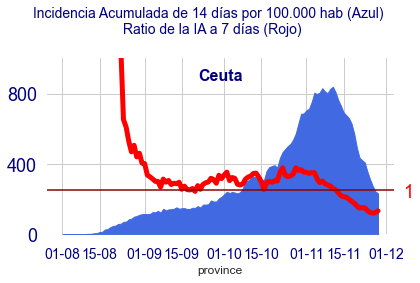

In [73]:
grafico_IA14_ratio(datos,campos,['Ceuta'],'ceuta')

<Figure size 720x360 with 0 Axes>

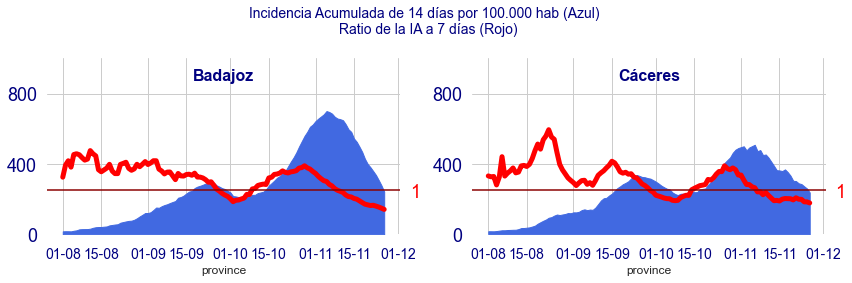

In [74]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')

<Figure size 720x360 with 0 Axes>

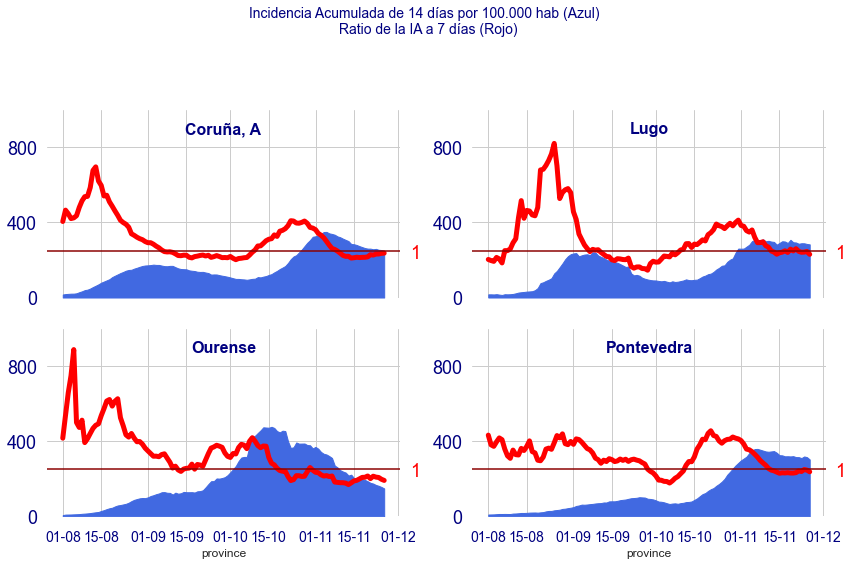

In [75]:
grafico_IA14_ratio(datos,campos,['Coruña, A','Lugo','Ourense','Pontevedra'],'galicia')

<Figure size 720x360 with 0 Axes>

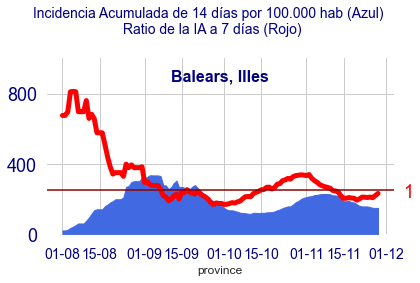

In [76]:
grafico_IA14_ratio(datos,campos,['Balears, Illes'],'baleares')

<Figure size 720x360 with 0 Axes>

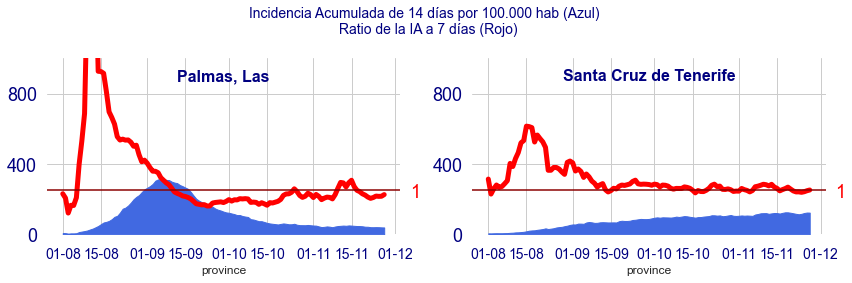

In [77]:
grafico_IA14_ratio(datos,campos,['Palmas, Las', 'Santa Cruz de Tenerife'],'canarias')

<Figure size 720x360 with 0 Axes>

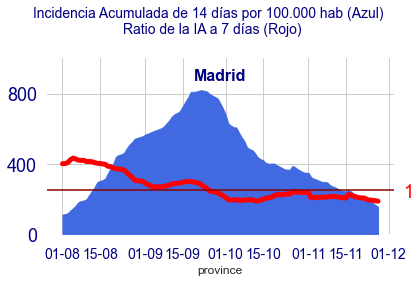

In [78]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

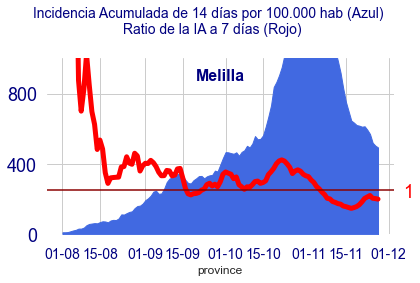

In [79]:
grafico_IA14_ratio(datos,campos,['Melilla'],'melilla')

<Figure size 720x360 with 0 Axes>

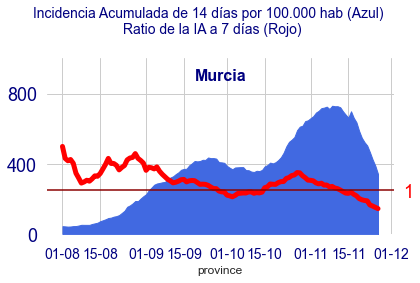

In [80]:
grafico_IA14_ratio(datos,campos,['Murcia'],'murcia')

<Figure size 720x360 with 0 Axes>

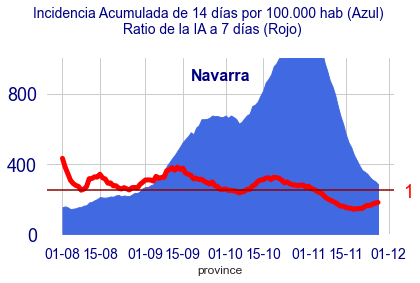

In [81]:
grafico_IA14_ratio(datos,campos,['Navarra'],'navarra')

<Figure size 720x360 with 0 Axes>

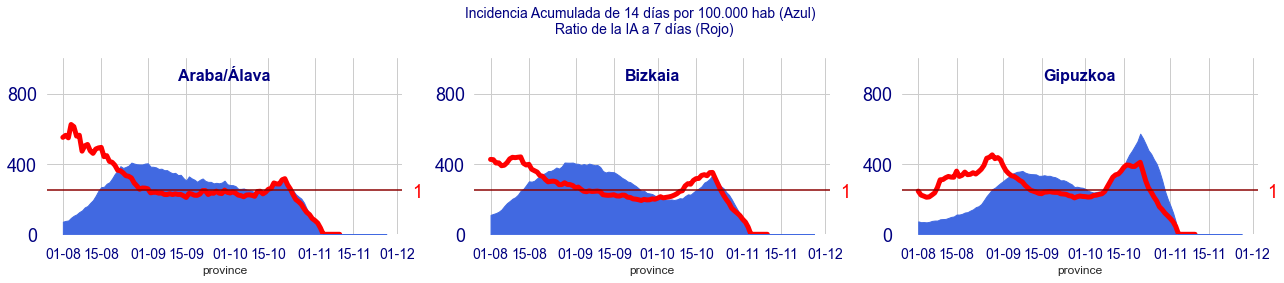

In [82]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

<Figure size 720x360 with 0 Axes>

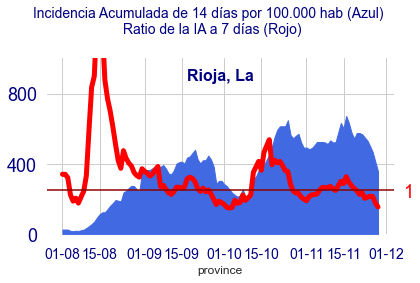

In [83]:
grafico_IA14_ratio(datos,campos,['Rioja, La'],'rioja')

<Figure size 720x360 with 0 Axes>

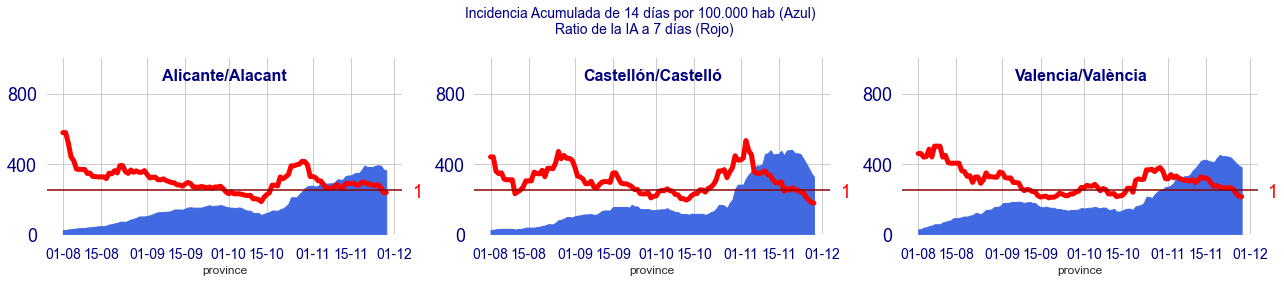

In [84]:
grafico_IA14_ratio(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

# Gráficos Hospitalizados

In [ ]:
def grafico_hospitalizados (datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    hospitalizados = 'hospitalized_per_100000'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1000)
        #ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy')
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/hospit_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

In [ ]:
grafico_hospitalizados(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

# Multi provincia con Hospitalizados

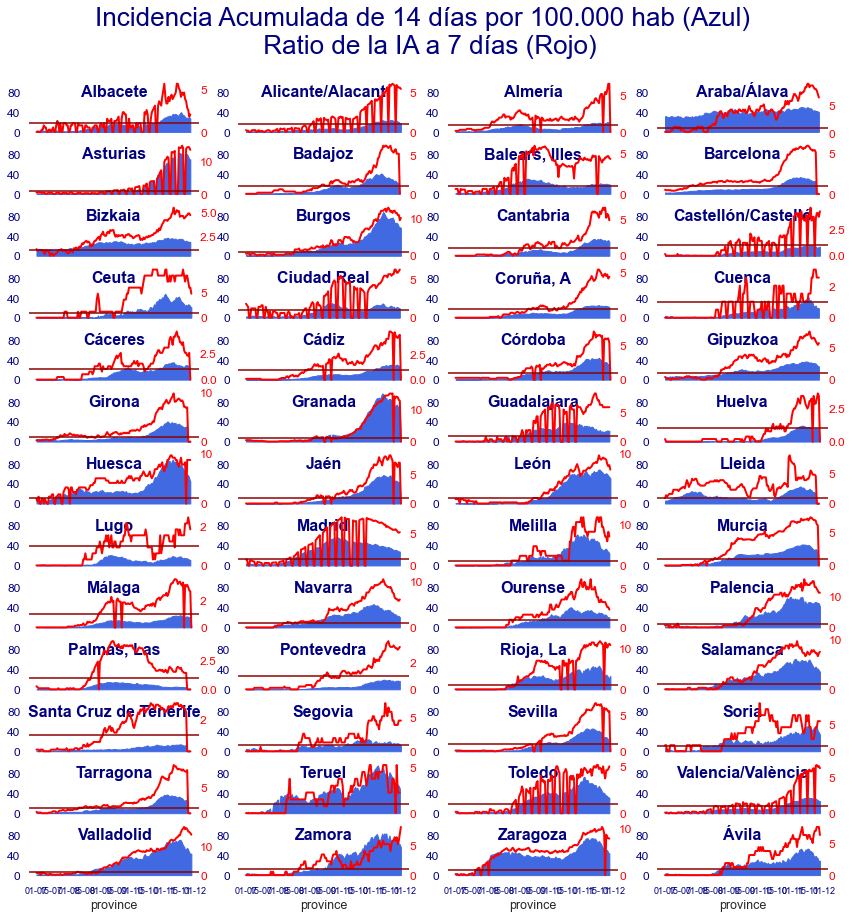

In [37]:

#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)

# Título

hospitalizados = 'hospitalized_per_100000'
uci ='intensive_care_per_1000000'

#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
    #ax1.set_ylim(0,1200)
    #ax1.set_yticks([0,600,1200])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[uci], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    #ax2.set_ylim(0,4)
    #ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1,15]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax.transAxes)

#g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
#g.set(yticks=[])
#g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...

#for ax in g.axes:
#    ax.xaxis.set_major_formatter(XmajorFmt)
 #   ax.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
 #   ax.xaxis.set_major_locator(DayLocator([1,15]))
    
#    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
#    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# [plt.setp(ax.texts, text="") for ax in g.axes.flat] 
# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)
#plt.tight_layout(w_pad=1,h_pad=10,pad=10)

#g.fig.subplots_adjust(top=.7)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
#g.fig.subplots_adjust(top=.9)
g.fig.subplots_adjust(top=.9,wspace=0.23,hspace=.17)   

plt.savefig('graficos/hosp_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


In [85]:
def grafico_IA14_ratio_vs(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    color_tags = 'navy'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (EjeX) \n Ratio de la IA a 7 días (EjeY)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    #diccionario con el tamaño de los textos dependiendo del numero de columnas:
    #key=nº columnas, values=(tamaño titulos, nombre provincia, tamaño tags,ratio)
    
    text_size={1:(16,16,12,2),2:(22,20,14,2),3:(24,24,16,1.5)}
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(15,15))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', 
                      margin_titles=False, col_wrap=columnas,aspect=text_size[columnas][3], 
                      height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    
    x_min = datos_[AI].min()
    x_max = ((datos_[AI].max() // 100)+1)*100
    y_min = datos_[clave_ratio].min()
    y_max = ((datos_[clave_ratio].max() // .5)+1)*.5
    if (y_max != y_max) or (y_max>3):
        y_max = 2
    print (y_max)
    
    
    def grafica(x, color, label):
        
        
        
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        colores1 = sns.color_palette("Blues",df_datos.shape[0])
        
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, 1.0, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=text_size[columnas][1],transform=ax1.transAxes)
        ax1.scatter(df_datos[AI],df_datos[clave_ratio],color=colores1)
    
    
        ax1.set_ylim(0,y_max)
        ax1.set_yticks(list(np.arange(0,y_max,1)))
        ax1.set_yticks([0,.5,1,1.5,2,2.5])
        
        ax1.set_xlim(0,x_max)
        ax1.set_xticks(np.arange(0,x_max,200))
        
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        #ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=18,width=5,length=10,labelcolor='navy')
        #ax1.set_xticks([])
        ax1.grid(False,axis='both',which='both')
        
        df_datos = df_datos.reset_index(drop=True)
        rango=np.arange(0,len(df_datos.index),15)
        rang=np.unique(np.append([0],rango))
        if abs(rang[-1]-len(df_datos.index)) >= 5:
            rang=np.unique(np.append(rango,[0,len(df_datos.index)-1]))
        df_datos= df_datos.iloc[list(rang)]
        ax1.axhline(1,color=color_linea)
        for indice in df_datos.index:
            style = dict(size=text_size[columnas][2], color=color_tags,weight='bold')
            texto = ax1.annotate(df_datos.loc[indice,'date'].strftime('%b%-d'),
                                xy=(df_datos.loc[indice,AI],df_datos.loc[indice,clave_ratio]),
                                xycoords='data',
                                xytext=(5, 5), 
                                textcoords='offset points',
                                **style)
            
        
        
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=text_size[columnas][0],color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=1,pad=1)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+'vs_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

2


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


<Figure size 1080x1080 with 0 Axes>

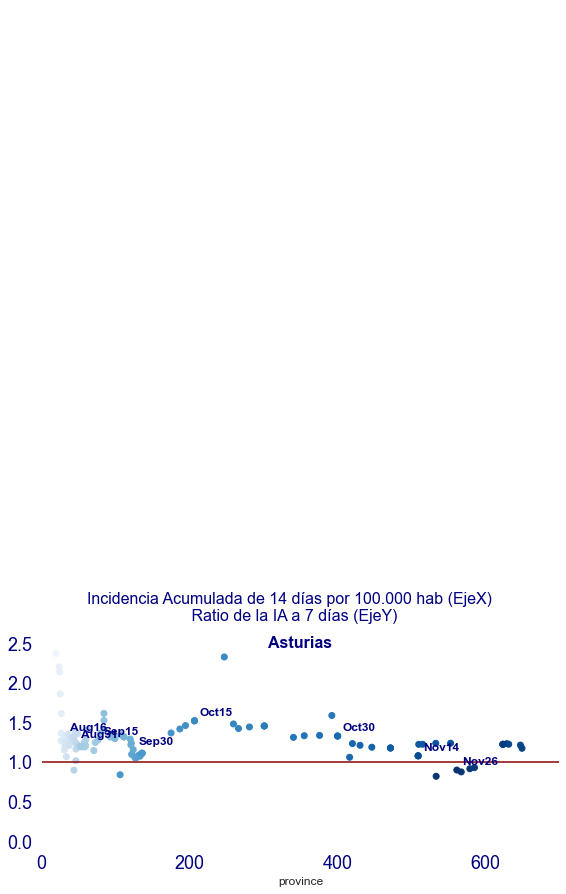

In [86]:
grafico_IA14_ratio_vs(datos,campos,['Asturias'],'asturias')

<Figure size 720x360 with 0 Axes>

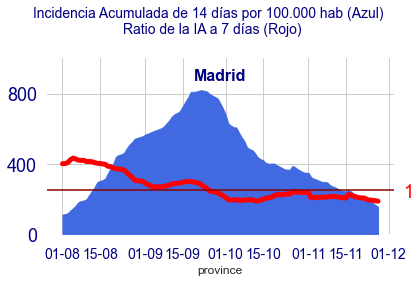

In [87]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

2.0


<Figure size 1080x1080 with 0 Axes>

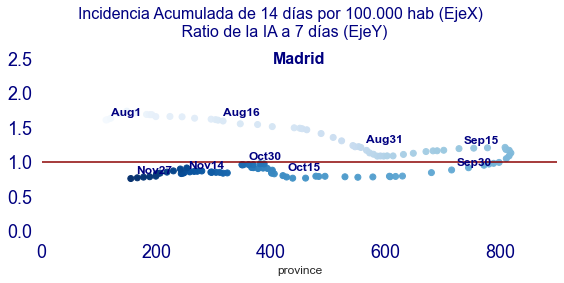

In [88]:
grafico_IA14_ratio_vs(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

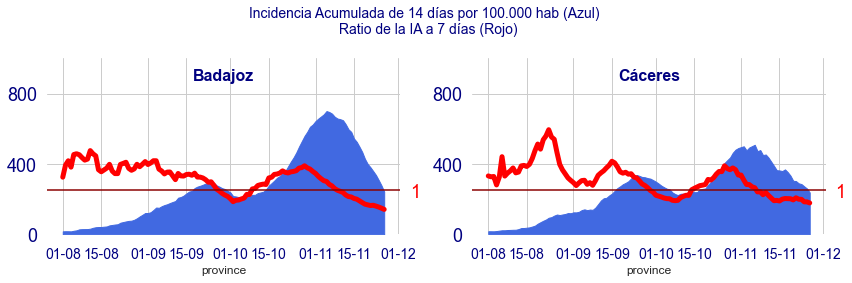

In [89]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')

2.5


<Figure size 1080x1080 with 0 Axes>

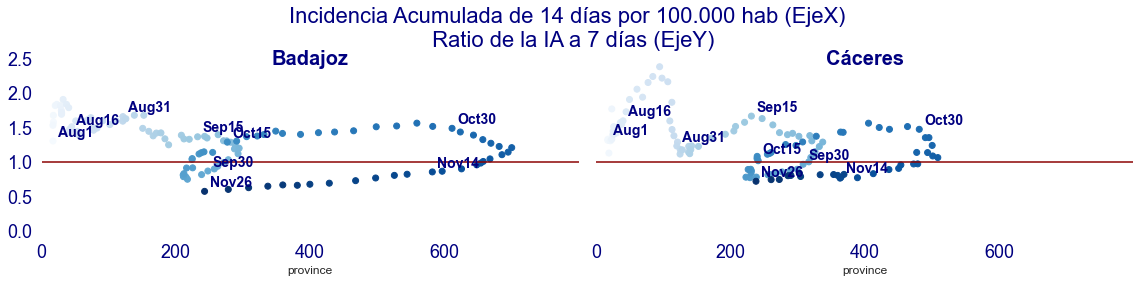

In [90]:
grafico_IA14_ratio_vs(datos,campos,['Badajoz','Cáceres'],'extremadura')

3.0


<Figure size 1080x1080 with 0 Axes>

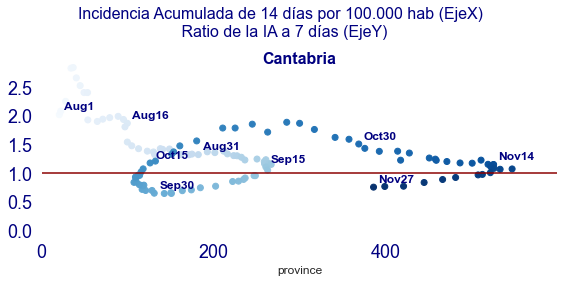

In [91]:
grafico_IA14_ratio_vs(datos,campos,['Cantabria'],'cantabria')

In [92]:
datos.loc[datos['province']=='Madrid']

date province  ine_code                  ccaa  new_cases  PCR  \
9494  2020-07-01   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9546  2020-07-02   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9598  2020-07-03   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9650  2020-07-04   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9702  2020-07-05   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9754  2020-07-06   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9806  2020-07-07   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9858  2020-07-08   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9910  2020-07-09   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9962  2020-07-10   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10014 2020-07-11   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10066 2020-07-12   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10118 2020-07-13   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10170 2020-07-14   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10222 2020-07-15   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10274 2020-07-16   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10326 2020-07-17   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10378 2020-07-18   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10430 2020-07-19   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10482 2020-07-20   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10534 2020-07-21   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10586 2020-07-22   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10638 2020-07-23   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10690 2020-07-24   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10742 2020-07-25   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10794 2020-07-26   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10846 2020-07-27   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10898 2020-07-28   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10950 2020-07-29   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11002 2020-07-30   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11054 2020-07-31   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11106 2020-08-01   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11158 2020-08-02   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11210 2020-08-03   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11262 2020-08-04   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11314 2020-08-05   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11366 2020-08-06   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11418 2020-08-07   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11470 2020-08-08   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11522 2020-08-09   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11574 2020-08-10   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11626 2020-08-11   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11678 2020-08-12   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11730 2020-08-13   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11782 2020-08-14   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11834 2020-08-15   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11886 2020-08-16   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11938 2020-08-17   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11990 2020-08-18   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12042 2020-08-19   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12094 2020-08-20   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12146 20

2.0


<Figure size 1080x1080 with 0 Axes>

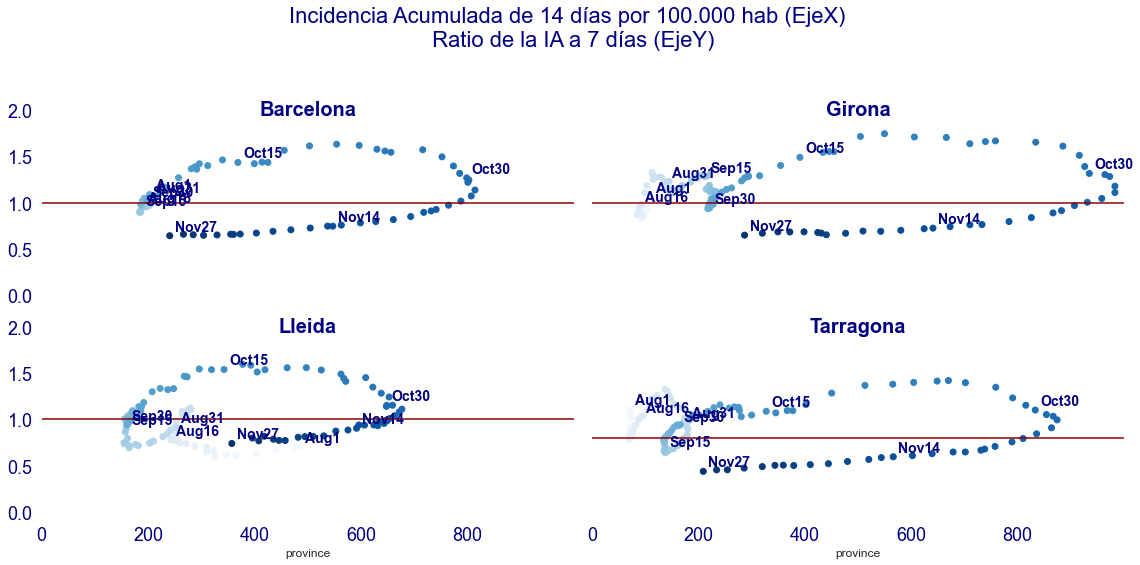

In [93]:
grafico_IA14_ratio_vs(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña')

2


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


<Figure size 1080x1080 with 0 Axes>

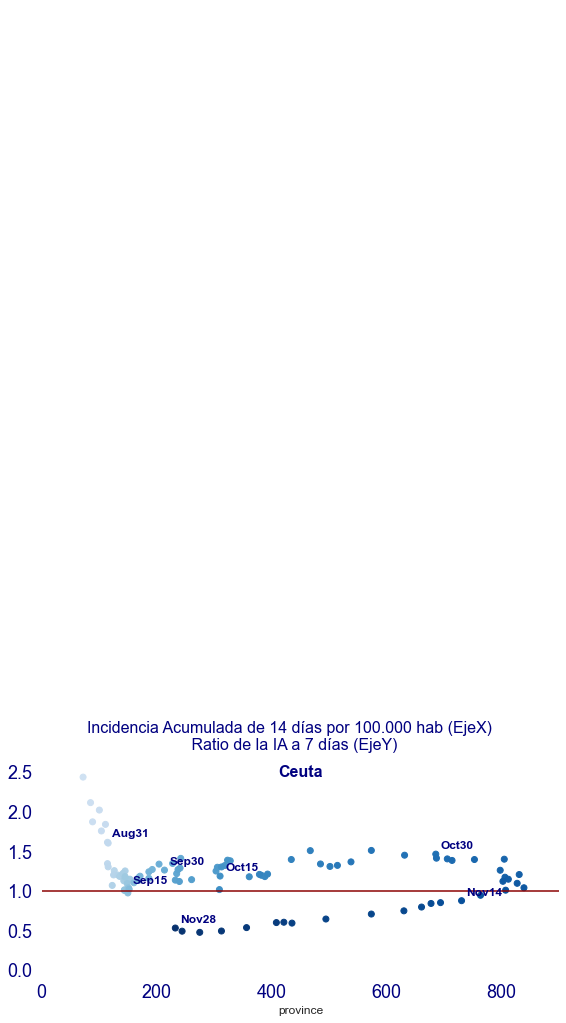

In [94]:
grafico_IA14_ratio_vs(datos,campos,['Ceuta'],'ceuta')

2


<Figure size 1080x1080 with 0 Axes>

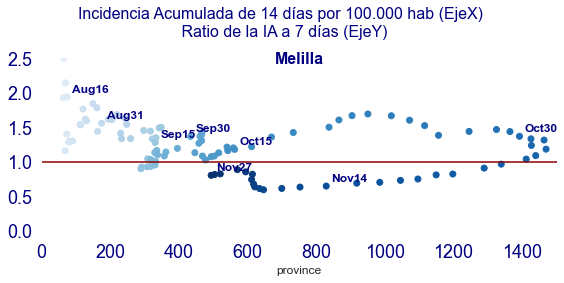

In [95]:
grafico_IA14_ratio_vs(datos,campos,['Melilla'],'melilla')

2.0


<Figure size 1080x1080 with 0 Axes>

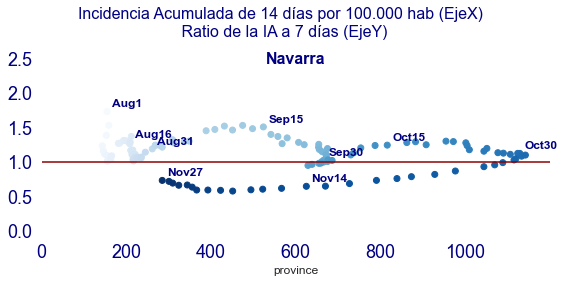

In [96]:
grafico_IA14_ratio_vs(datos,campos,['Navarra'],'navarra')

2


<Figure size 1080x1080 with 0 Axes>

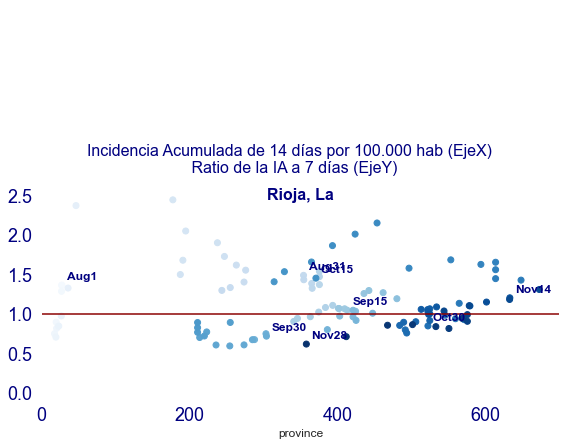

In [97]:
grafico_IA14_ratio_vs(datos,campos,['Rioja, La'],'rioja')

2.5


<Figure size 1080x1080 with 0 Axes>

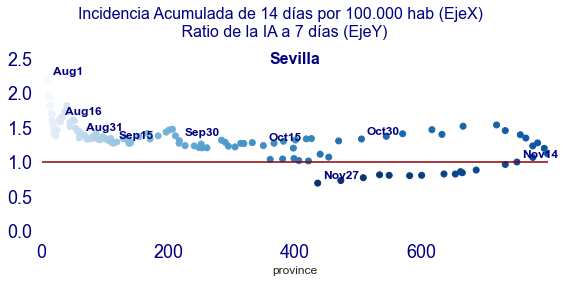

In [98]:
grafico_IA14_ratio_vs(datos,campos,['Sevilla'],'sevilla')

2


<Figure size 1080x1080 with 0 Axes>

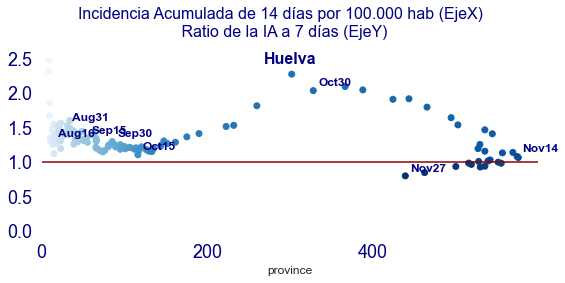

In [99]:
grafico_IA14_ratio_vs(datos,campos,['Huelva'],'huelva')

2.5


<Figure size 1080x1080 with 0 Axes>

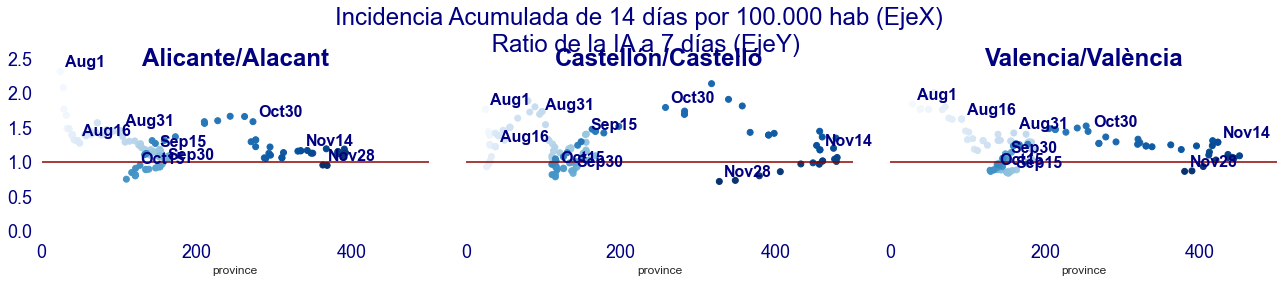

In [100]:
grafico_IA14_ratio_vs(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

2


<Figure size 1080x1080 with 0 Axes>

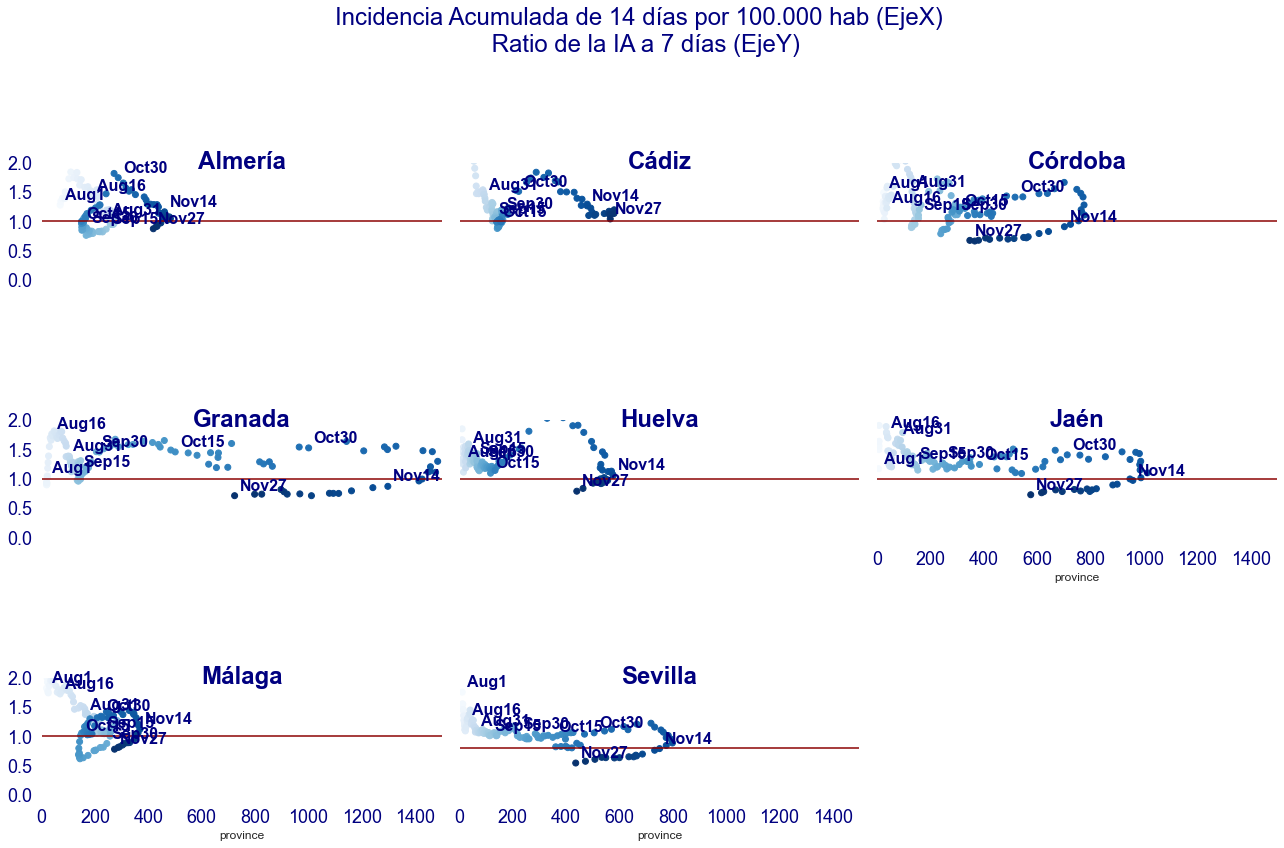

In [101]:
grafico_IA14_ratio_vs(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')

In [102]:
datos.tail()

date province  ine_code             ccaa  new_cases  PCR  TestAc  \
17061 2020-11-24    Ávila         5  Castilla y León       25.0  0.0     0.0   
17113 2020-11-25    Ávila         5  Castilla y León       34.0  0.0     0.0   
17165 2020-11-26    Ávila         5  Castilla y León       20.0  0.0     0.0   
17216 2020-11-27    Ávila         5  Castilla y León       28.0  0.0     0.0   
17258 2020-11-28    Ávila         5  Castilla y León       27.0  0.0     0.0   

       activos  hospitalized  intensive_care  deceased  cases_accumulated  \
17061      0.0          56.0            12.0     225.0                0.0   
17113      0.0          53.0            12.0     228.0                0.0   
17165      0.0          43.0            12.0     230.0                0.0   
17216      0.0          46.0            10.0     231.0                0.0   
17258      0.0          50.0            10.0     232.0                0.0   

       cases_accumulated_PCR  recovered  deceased_hosp_eus  num_casos  \
17061                 6835.0     1080.0                0.0        4.0   
17113                 6869.0     1088.0                0.0        0.0   
17165                 6889.0     1101.0                0.0        0.0   
17216                 6917.0     1102.0                0.0        0.0   
17258                 6944.0     1104.0                0.0        0.0   

       num_casos_prueba_pcr  num_casos_prueba_test_ac  num_casos_prueba_otras  \
17061                   1.0                       0.0                     3.0   
17113                   0.0                       0.0                     0.0   
17165                   0.0                       0.0                     0.0   
17216                   0.0                       0.0                     0.0   
17258                   0.0                       0.0                     0.0   

       num_casos_prueba_desconocida  poblacion  cases_per_cienmil  \
17061                           0.0     157640                0.0   
17113                           0.0     157640                0.0   
17165                           0.0     157640                0.0   
17216                           0.0     157640                0.0   
17258                           0.0     157640                0.0   

       intensive_care_per_1000000  deceassed_per_100000  \
17061                        7.61                142.73   
17113                        7.61                144.63   
17165                        7.61                145.90   
17216                        6.34                146.54   
17258                        6.34                147.17   

       hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
17061                    35.52           0.0          0.0             597.0   
17113                    33.62           0.0          0.0             591.0   
17165                    27.28           0.0          0.0             548.0   
17216                    29.18           0.0          0.0             497.0   
17258                    31.72           0.0          0.0             457.0   

       cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
17061            223.0         25.0              31.9             25.0   
17113            198.0         34.0              28.3             34.0   
17165            181.0         20.0              25.9             20.0   
17216            168.0         28.0              24.0             28.0   
17258            166.0         27.0              23.7             27.0   

       daily_cases_PCR_avg7  daily_deaths  daily_deaths_hosp_eus  \
17061                  31.9           3.0                    0.0   
17113                  28.3           3.0                    0.0   
17165                  25.9           2.0                    0.0   
17216                  24.0           1.0                    0.0   
17258                  23.7           1.0                    0.0   

       daily_deaths_inc  daily_deaths_avg3 

In [ ]:
datos